In [1]:
from library.analysis import loadDataset, testSets
from library.exercise import plotCloud
from library.generators.XConvGeN import XConvGeN, GeneratorConfig
from library.timing import timing
from fdc.fdc import FDC
#from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf

2022-12-08 15:16:15.678698: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-08 15:16:15.795899: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-08 15:16:15.795919: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-08 15:16:15.822718: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-12-08 15:16:16.427243: W tensorflow/stream_executor/platform/de

In [2]:
data = loadDataset(testSets[0])

Load 'folding_abalone_17_vs_7_8_9_10'
from pickle file
Data loaded.


In [3]:
print((len(data.data), len(data.data0), len(data.data1)))

(2338, 2280, 58)


In [4]:
fdc = FDC()
fdc.nom_list = [0]
fdc.cont_list = list(range(data.data0.shape[1]))[1:]

In [5]:
config = GeneratorConfig(n_feat=data.data0.shape[1], neb=5, genAddNoise=True)
gen = XConvGeN(config=config, fdc=fdc, debug=True)

In [6]:
gen.reset(data.data)

2022-12-08 15:16:22.409200: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-12-08 15:16:22.409222: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-08 15:16:22.409241: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (f689f5a8be0b): /proc/driver/nvidia/version does not exist
2022-12-08 15:16:22.409472: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


neb=5, gen=5
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 5, 8)]       0           []                               
                                                                                                  
 UnsharpenInput (Conv1D)        (None, 3, 8)         200         ['input_1[0][0]']                
                                                                                                  
 InputMatrixToVector (Flatten)  (None, 24)           0           ['UnsharpenInput[0][0]']         
                                                                                                  
 P5_dense (Dense)               (None, 25)           625         ['InputMatrixToVector[0][0]']    
                                                                                 

FDC.normalize (init): 0.00002 / 0.000s
|data| = (2338, 8)
umap with metric 'euclidean'
|part| = (2338, 7)
|emb_A| = (2338, 2)
|emb_A| = (2338, 2)
FDC.normalize (clustering CONT): 12.90312 / 12.903s
FDC.normalize (clustering ORD): 0.00002 / 12.903s
umap with metric 'hamming'
|part| = (2338, 1)
|emb_A| = (2338, 1)
|emb_A| = (2338, 1)
FDC.normalize (clustering NOM): 25.12376 / 38.027s
FDC.normalize (concat): 0.00005 / 38.027s
|fdc| = (2338, 3)
FDC.normalize (total): 0.00001 / 38.027s


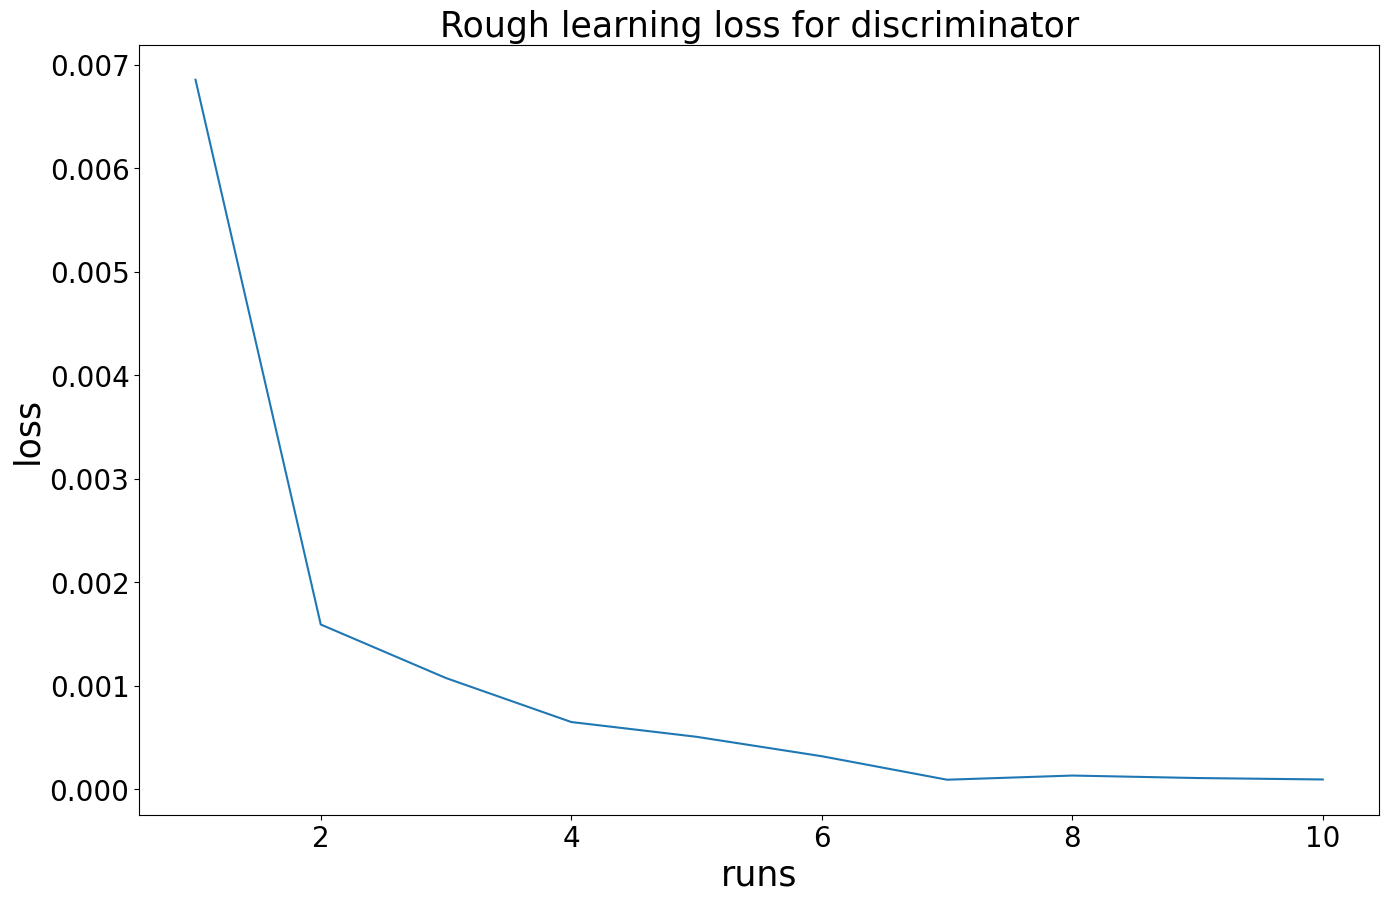

train: #1 1843.5273s


In [7]:
t = timing("train")
t.start()
gen.train(data.data)
t.stop()
print(t)

# train: #1 225.9655s

In [8]:
syntheticPoints = gen.generateData(data.data1.shape[0])

In [9]:
syntheticPoints[:5]

array([[ 1.0000000e+00,  2.3015420e+00,  4.6079218e-02,  7.7081907e-01,
        -3.4013987e-02, -1.3480505e-01, -6.3393188e-01, -1.2388859e+00],
       [ 1.0000000e+00,  8.5691714e-01, -1.0228012e+00,  5.3488541e-01,
         5.2268308e-01,  2.0623505e-03,  5.8587635e-01,  1.2566128e+00],
       [ 1.0000000e+00,  2.6453197e-01, -6.9461459e-01,  1.2983665e+00,
         2.0413193e-01,  8.2688111e-01,  9.6752304e-01,  1.1820554e+00],
       [ 1.0000000e+00, -1.0983694e+00,  5.0834978e-01, -9.4611064e-02,
         3.1308138e-01, -3.2300714e-01,  6.0562038e-01, -1.8296972e-01],
       [ 1.0000000e+00,  1.9067401e-01,  2.4663229e+00, -4.1466138e-01,
         2.1007557e+00, -1.7141981e-01, -3.6188236e-01, -1.1953378e+00]],
      dtype=float32)

In [10]:
data.data1[:5]

array([[2.    , 0.565 , 0.425 , 0.16  , 0.9425, 0.3495, 0.2185, 0.275 ],
       [0.    , 0.495 , 0.4   , 0.155 , 0.6445, 0.242 , 0.1325, 0.205 ],
       [2.    , 0.54  , 0.435 , 0.18  , 0.996 , 0.3835, 0.226 , 0.325 ],
       [0.    , 0.69  , 0.56  , 0.215 , 1.719 , 0.68  , 0.299 , 0.47  ],
       [0.    , 0.68  , 0.55  , 0.21  , 1.7445, 0.5975, 0.305 , 0.625 ]])

In [11]:
import math
dists = [min([math.sqrt(sum(y*y)) for y in (data.data1 - p) ]) for p in syntheticPoints]
print( min(dists), sum(dists) / len(dists), max(dists) )

1.1281014723706335 2.3505856661513693 4.853550994444655


In [12]:
v = gen.predictReal(data.data1)
(min(v), max(v), sum(v) / len(v))

2/2 [==============================] - 0s 2ms/step


(1.1368595e-05, 0.12811339, 0.0030172379738046557)

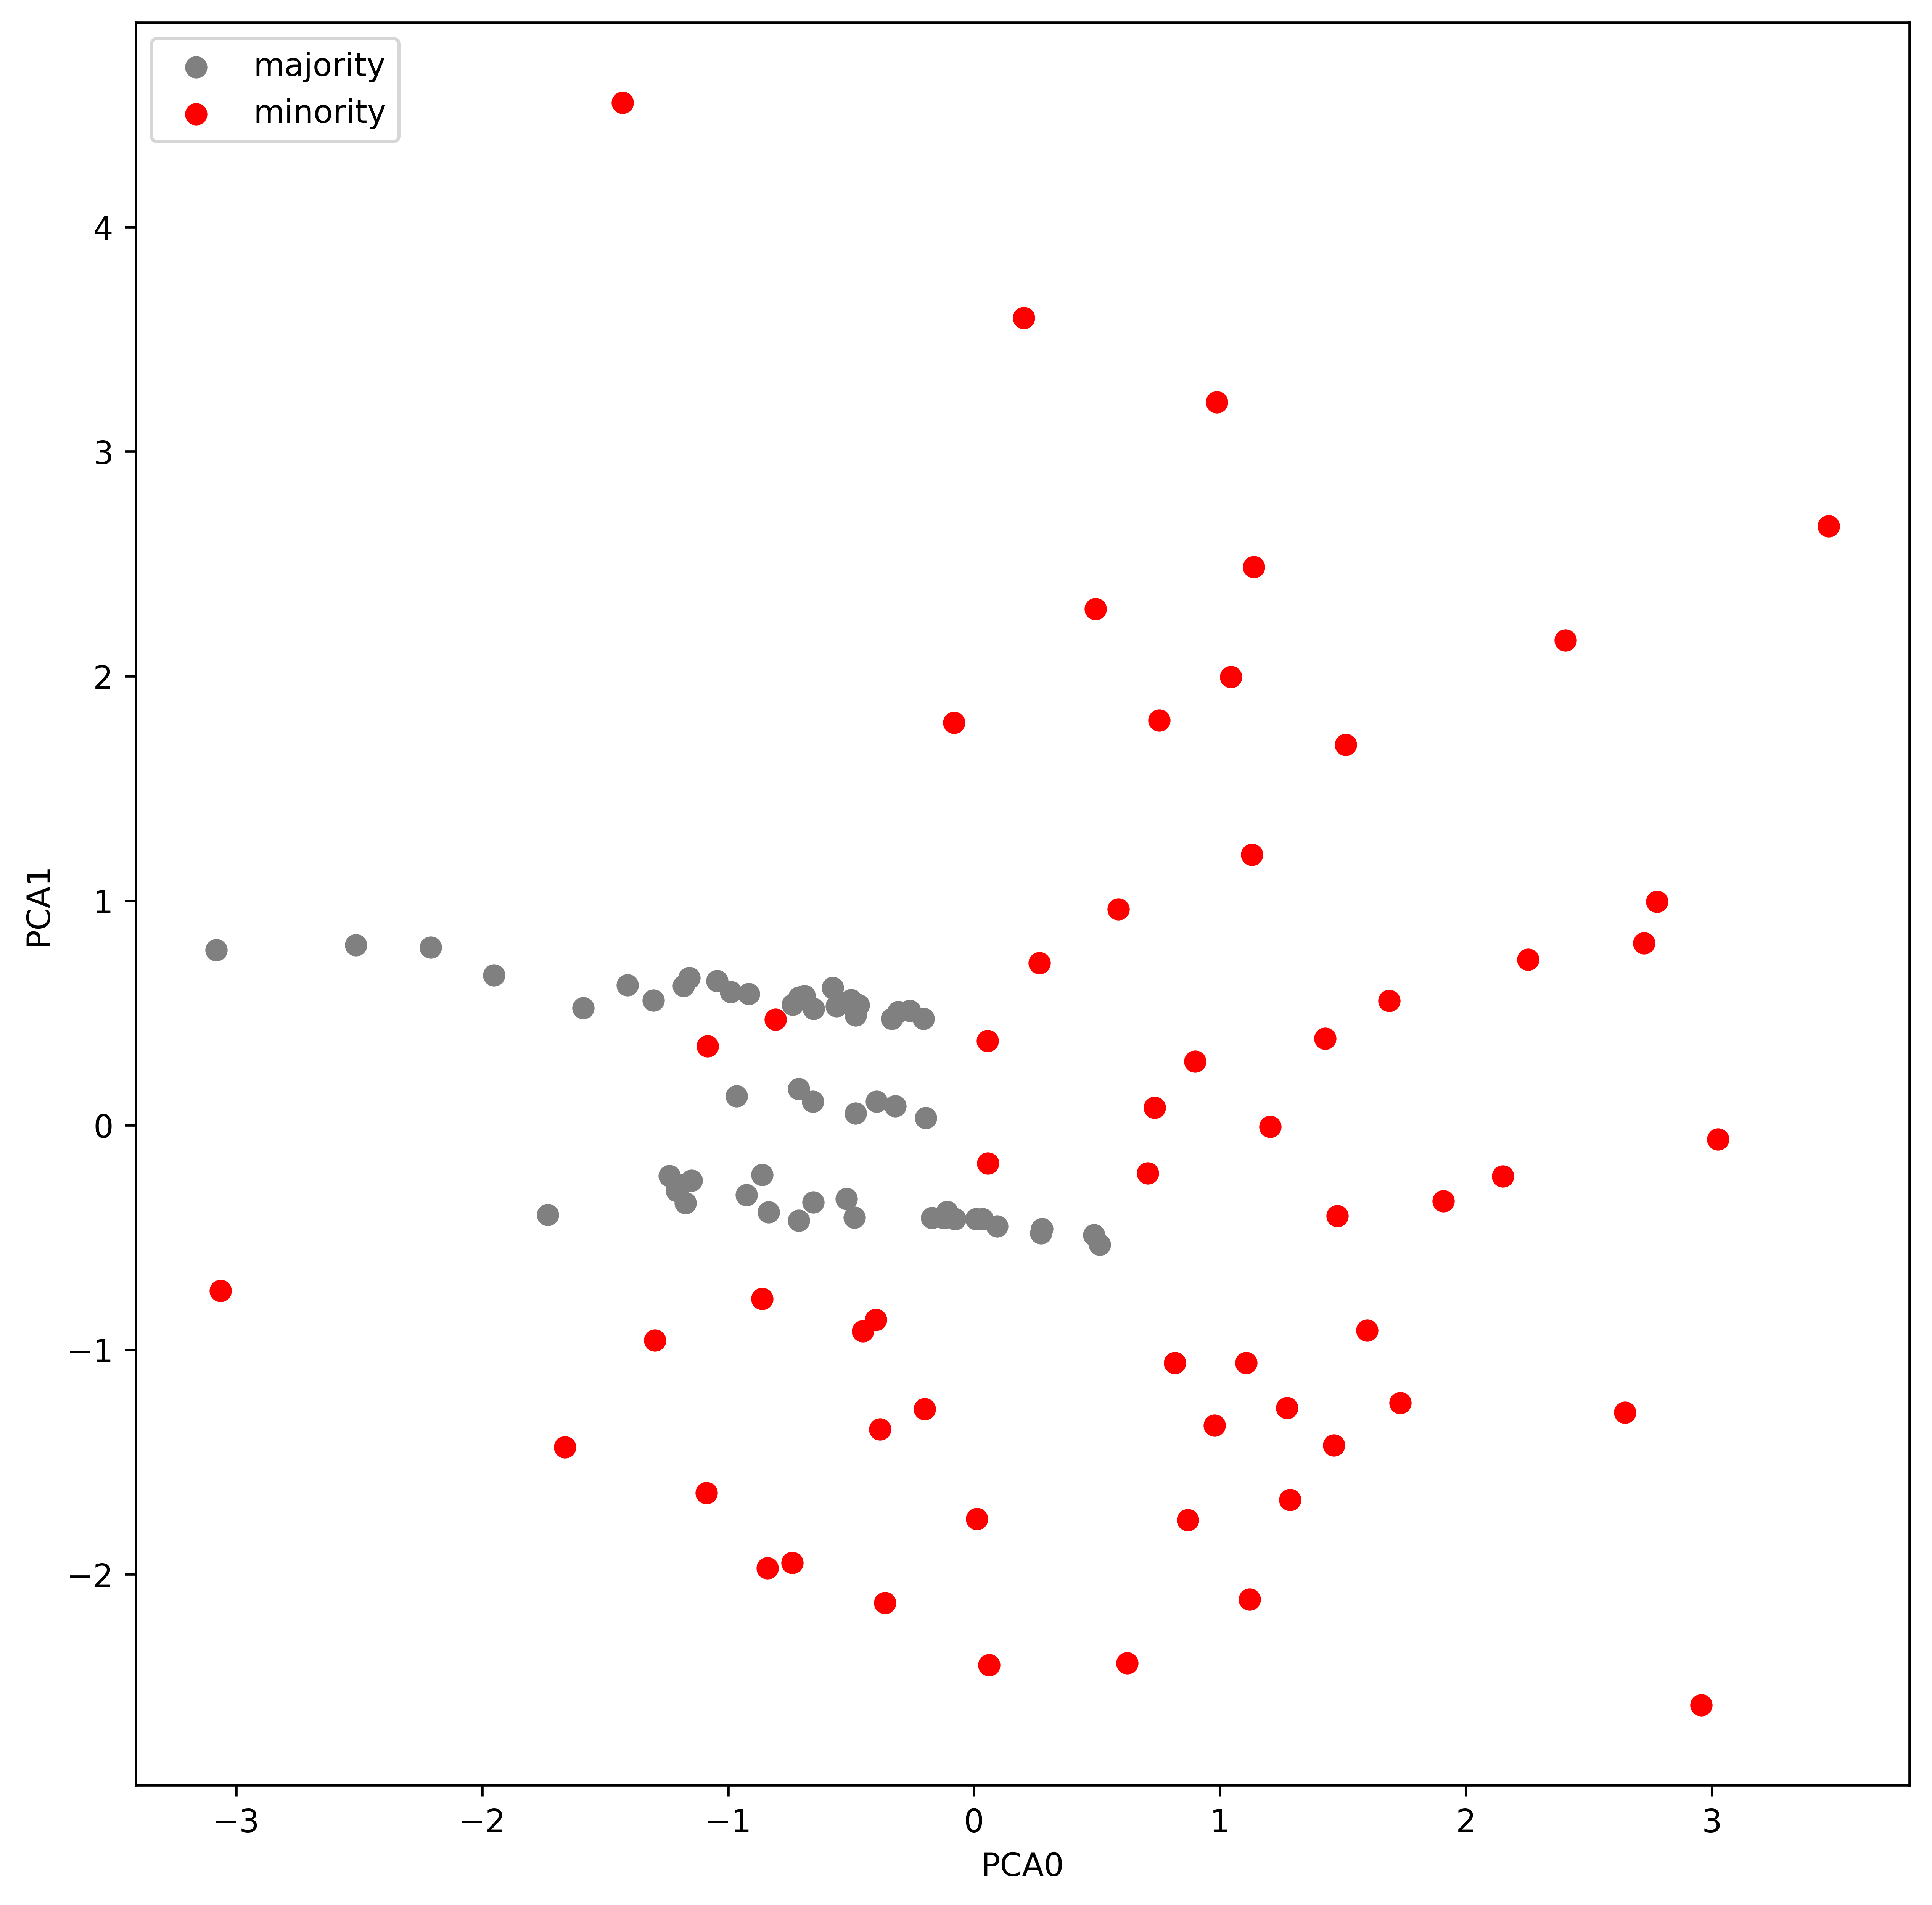

In [13]:
plotCloud(data.data1, syntheticPoints)